In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# defining the X
X = data[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
# importing kmeans
from sklearn.cluster import KMeans

In [12]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++',
                  max_iter = 300, n_init=10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

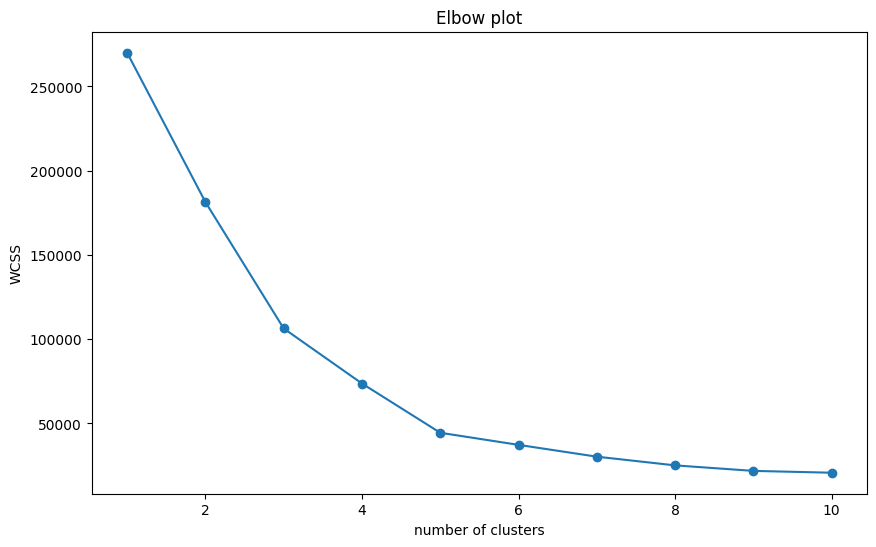

In [14]:
# plotting the elbow method
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow plot')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# applying kmeans clustering with optimum
# number of clusters

kmeans = KMeans(n_clusters=5,init = 'k-means++',
max_iter=300,n_init = 10, random_state=0)

y_kmeans = kmeans.fit_predict(X)

In [16]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [17]:
data['Cluster']=y_kmeans

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


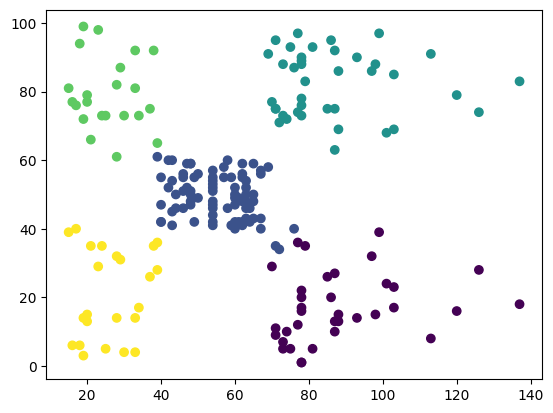

In [18]:
# plotting the clusters
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],
            c = y_kmeans)
plt.show()

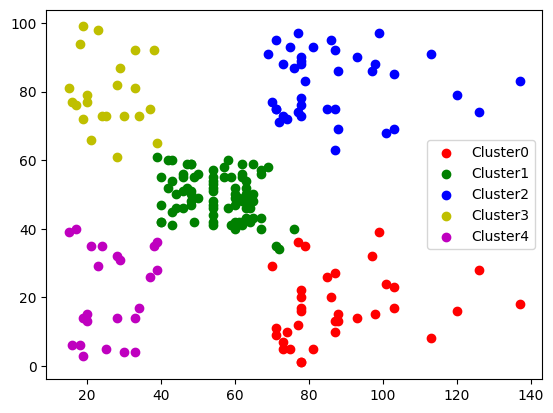

In [22]:
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans==i]
  plt.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              c=colors[i],
              label= f'Cluster{i}')
  plt.legend()

In [26]:
# function to predict for new customer
def predict_cluster(annual_income,spending_score):
  new_data = [[annual_income,spending_score]]
  cluster = kmeans.predict(new_data)
  return cluster[0]


In [27]:
new_customer_income = 80
new_customer_score = 20

predicted_cluster = predict_cluster(new_customer_income,new_customer_score)
print(f'The customer belongs to cluster: {predicted_cluster}')

The customer belongs to cluster: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
